In [232]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
import os

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor,StackingRegressor


# Reading the Metadata

In [234]:
def create_dataset(img_folder):
   
    image_path=[]
    labels=[]
      

    for file in os.listdir(img_folder):       
            image_path.append(img_folder)
            label = file
            labels.append(label)
       
    return image_path,labels

In [235]:

X, id = create_dataset('/content/drive/MyDrive/Machine Learning: 589/Project/train')
features = pd.read_csv('/content/drive/MyDrive/Machine Learning: 589/Project/train.csv')

In [236]:
X_features = features.iloc[:, 1:13]
scores =features.iloc[:, -1]

#Training data = 70% of the dataset, Test data= 15% of the dataset, Val Data - 15% of the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_features, scores, test_size = 0.3, shuffle=True)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5 , shuffle=True) 



print("Training Data")
print(X_train)
print("Validation Data")
print(X_val)
print("Testing Data")
print(X_test)

Training Data
      Subject Focus  Eyes  Face  Near  ...  Human  Occlusion  Info  Blur
9733              0     1     1     1  ...      0          0     0     0
1829              0     1     1     0  ...      0          0     0     0
2222              0     1     0     0  ...      0          0     1     0
178               0     1     1     1  ...      0          0     0     0
5917              0     1     1     1  ...      0          0     0     0
...             ...   ...   ...   ...  ...    ...        ...   ...   ...
8098              0     1     1     1  ...      0          1     0     0
3057              0     1     1     1  ...      1          1     0     0
8601              0     1     1     1  ...      0          0     0     0
1900              0     0     1     1  ...      1          0     0     0
8699              0     1     1     1  ...      0          0     1     0

[6938 rows x 12 columns]
Validation Data
      Subject Focus  Eyes  Face  Near  ...  Human  Occlusion  Info  

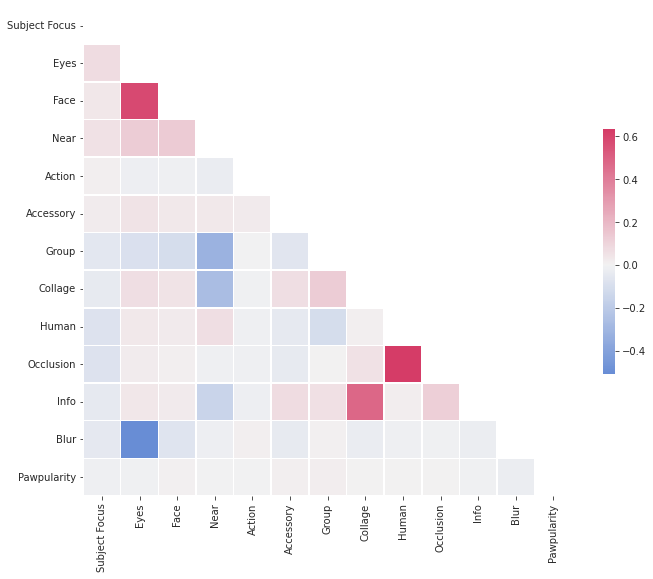

In [247]:
corr = features.corr()
sns.set_style("ticks")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(256, 1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Linear Models

### Linear Regression

In [164]:
# testing linear regressor 

reg = LinearRegression().fit(X_train, Y_train)

y_pred = reg.predict(X_val)

rmse = mean_squared_error(Y_val, y_pred, squared=False)
rmse

19.86601694568212

### Ridge Regression

In [215]:
def hyper_parameter_tuning(model_class, alphas, train, valid):
   
    train_X, train_y = train
    valid_X, valid_y = valid

   

    # train the model with each alpha
    best_mae = float("inf")
    best_model, best_params = None, None
    
    for  alpha in alphas:
        print(f"Alpha: {alpha}")
        classifier = Ridge(alpha = alpha)
        classifier.fit(train_X, train_y)
        y_pred = classifier.predict(valid_X)

        mae = mean_squared_error( y_pred, valid_y,squared=False)
        print(f"RMSE: {mae}")
        if best_mae > mae:
            best_mae = mae
            best_model = classifier
            best_params = alpha

    print(f"Best Values: RSME= {best_mae}, Model= {best_model}, Alpha= {best_params}")
    # choose the model with lowest rmse on validation set
    # then fit the model with the training and validation set (refit)
    X = np.concatenate([train_X, valid_X], axis=0)
    y = np.concatenate([train_y, valid_y], axis=0)
    best_model.fit(X, y)
    # return the fitted model and the best parameter setting
    return best_model, best_params

In [216]:
def plot_mae_alpha(model_class, params, train, valid, test, title="Model"):
    
    train_X = np.concatenate([train[0], valid[0]], axis=0)
    train_y = np.concatenate([train[1], valid[1]], axis=0)

    # set up the list of alphas to train on
    mae_list = []
    # train the model with each alpha, log MAE
    # print(params)
    for alpha in params:
        # print(param)
        classifier = model_class(tol=0.0001, alpha=alpha).fit(train_X, train_y)
        classifier.fit(train_X, train_y)
        y_pred = classifier.predict(test[0])
        mae =  mean_squared_error(y_pred, test[1],squared=False)
        mae_list.append(mae)
    print(mae_list)
    # plot the MAE - Alpha
    plt.plot(params, mae_list ,color='b', label=model_class)
    plt.title(title)
    plt.xlabel("Alpha")
    plt.ylabel("Root Mean Squared Error")
    plt.show()

Alpha: 5
RMSE: 19.865421132935865
Alpha: 6
RMSE: 19.86530782785057
Alpha: 7
RMSE: 19.865196381890797
Alpha: 8
RMSE: 19.865086756759766
Alpha: 9
RMSE: 19.864978914996254
Alpha: 10
RMSE: 19.864872819961068
Alpha: 15
RMSE: 19.864367319100538
Alpha: 20
RMSE: 19.863900438124215
Alpha: 25
RMSE: 19.863468434624632
Alpha: 30
RMSE: 19.863067970119353
Best Values: RSME= 19.863067970119353, Model= Ridge(alpha=30), Alpha= 30
[20.96505459500372, 20.96492806090017, 20.964803841247956, 20.964681874826926, 20.96456210270787, 20.964444468137188, 20.96388651136379, 20.963374559780867, 20.96290342513523, 20.962468697535805]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has featu

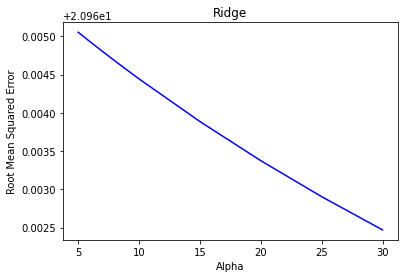

In [217]:
alpha=[5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
ridge_model, ridge_param = hyper_parameter_tuning(Ridge, alpha, (X_train,Y_train), (X_val,Y_val))
plot_mae_alpha(Ridge, [5, 6, 7, 8, 9, 10, 15, 20, 25, 30], (X_train,Y_train), (X_val,Y_val), (X_test,Y_test), "Ridge")

# Ensemble Methods

### RandomForestRegressor

No handles with labels found to put in legend.


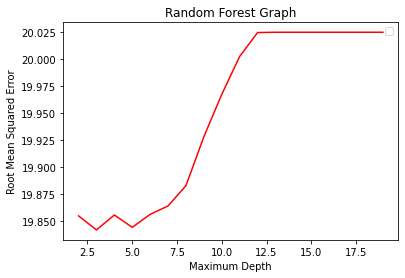

Random Forest Graph with the best RSME =19.842183360400313 max_depth =3 


In [230]:
rmses =[]
least_rmse =  float("inf")
best_depth = 0
max_depths = range(2, 20)
for depth in max_depths:
  classifier = RandomForestRegressor(n_estimators=50, max_depth = depth,max_features="log2",random_state=21)
  classifier.fit(X_train, Y_train)
  y_pred_sqrt = classifier.predict(X_val)
  rmse =  mean_squared_error(Y_val, y_pred_sqrt,squared = False)
  rmses.append(rmse)
  if least_rmse>rmse:
    least_rmse = rmse
    best_depth = depth


plt.plot(max_depths, rmses, color='r')
plt.xlabel("Maximum Depth")
plt.ylabel("Root Mean Squared Error")
plt.title("Random Forest Graph")

plt.legend()
plt.show()
print(f"Random Forest Graph with the best RSME ={least_rmse} max_depth ={best_depth} ")

### Stacking

In [171]:
estimators = [
     ('lr', RidgeCV()),
     ('svr', LinearSVR(random_state=21))]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,max_depth=4,max_features = 'log2',
                                         random_state=21))

In [231]:
reg

StackingRegressor(estimators=[('lr', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('svr', LinearSVR(random_state=21))],
                  final_estimator=RandomForestRegressor(max_depth=4,
                                                        max_features='sqrt',
                                                        random_state=21))

In [172]:
reg.fit(X_train, Y_train)
pred_Y = reg.predict(X_val)
rmses = mean_squared_error(Y_val,  pred_Y, squared=False)
rmses

19.84179517683221